In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd

from plotdelice.graphs import violinplot_delice, barplot_delice, multiplot_delice, scatterplot_delice

In [10]:
df = pd.read_csv('/Volumes/G_MLS_RB_UHOME$/qfavey/01_Experiments/B_Muscle_inhibition/ALL_analysis/ALL_RESULTS_curvtypes.csv')

In [11]:
groups = []
for name in df['fish id']:
    if 'cc2d2a' in name.lower():
        groups.append('Cc2d2a')
    if 'WT' in name:
        groups.append('WT')
    if 'inpp5e' in name.lower():
        groups.append('Inpp5e')
df['condition'] = groups



In [12]:
for cond in np.unique(df['condition']):
    print('#',cond,":",len(df[df['condition'] == cond]))
    

# Cc2d2a : 109
# Inpp5e : 33
# WT : 171


remove a sample that was not detected correctly by the DMLA

In [13]:
df['body curvature'][(df['body curvature']>4) & (df['condition']=='WT')] = np.nan
df['body curvature'][(df['body curvature']>4) & (df['condition']=='WT')]
df = df.dropna(subset=['body curvature','solidity','eccentricity','ferretd','condition','fish id','Curvtype','condition'])

/var/folders/f0/y364b8p96378s61mk8x86ksr0000gn/T/ipykernel_72425/2851212135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body curvature'][(df['body curvature']>4) & (df['condition']=='WT')] = np.nan


In [14]:
df

,Unnamed: 0,eye size,head size,jaw size,heart size,yolk size,bladder size,tail length,spine length,body length,...,dead,unhatched,eccentricity,ferretd,solidity,body angle,fish id,Curvtype,spine coords,condition
0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.92,NaN,...,True,False,0.955582,1231.920858,0.429414,NaN,Cc2d2a_1.png,A,[[ 922 2009]\n [ 922 2010]\n [ 923 2007]\n ......,Cc2d2a
1,32,0.300,NaN,NaN,0.107,1.380,NaN,0.631,5.71,6.21,...,False,False,0.987838,1443.835171,0.559748,176.994,Cc2d2a_10.png,A,NaN,Cc2d2a
2,33,0.240,0.378,NaN,NaN,1.720,0.1540,0.324,4.01,5.55,...,False,False,0.949377,1285.651586,0.426307,175.690,Cc2d2a_11.png,C,NaN,Cc2d2a
5,36,NaN,NaN,NaN,NaN,NaN,NaN,0.653,4.14,NaN,...,False,False,0.989090,1416.051553,0.613256,NaN,Cc2d2a_14.png,A,[[ 475 1111]\n [ 475 1112]\n [ 475 1113]\n ......,Cc2d2a
6,37,0.243,NaN,NaN,0.134,NaN,0.2530,NaN,5.62,5.73,...,False,False,0.980350,1407.971946,0.484443,96.182,Cc2d2a_15.png,A,[[ 914 1205]\n [ 914 1206]\n [ 914 1207]\n ......,Cc2d2a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,264,0.118,0.194,NaN,NaN,0.654,NaN,0.469,4.07,4.54,...,False,False,0.996133,974.540918,0.940828,179.984,WT_0236.png,ctrl,[[ 254 2127]\n [ 255 2124]\n [ 255 2125]\n ......,WT
309,265,0.205,0.161,NaN,NaN,0.693,0.0869,0.629,4.21,4.91,...,False,False,0.996559,1055.063979,0.944597,177.089,WT_0237.png,ctrl,[[ 950 1300]\n [ 951 1300]\n [ 951 1301]\n ......,WT
310,266,0.232,0.249,NaN,NaN,0.561,0.1030,0.605,4.22,5.16,...,False,False,0.995428,1053.653169,0.944751,178.527,WT_0238.png,ctrl,[[ 834 1304]\n [ 834 1305]\n [ 834 1306]\n ......,WT
311,267,0.146,0.187,NaN,NaN,0.533,0.1130,0.673,4.15,4.99,...,False,False,0.995734,1031.157117,0.925417,179.194,WT_0239.png,ctrl,[[ 366 1507]\n [ 366 1508]\n [ 366 1509]\n ......,WT


R^2:  0.724429559767258


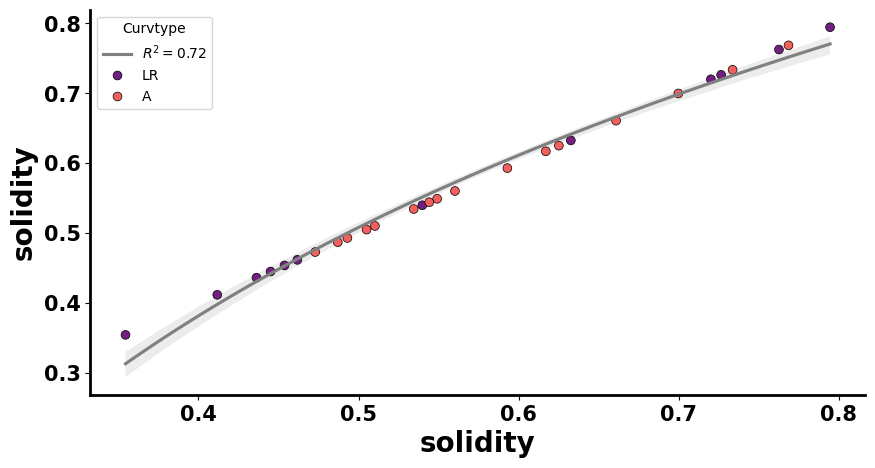

R^2:  0.6312663885243328


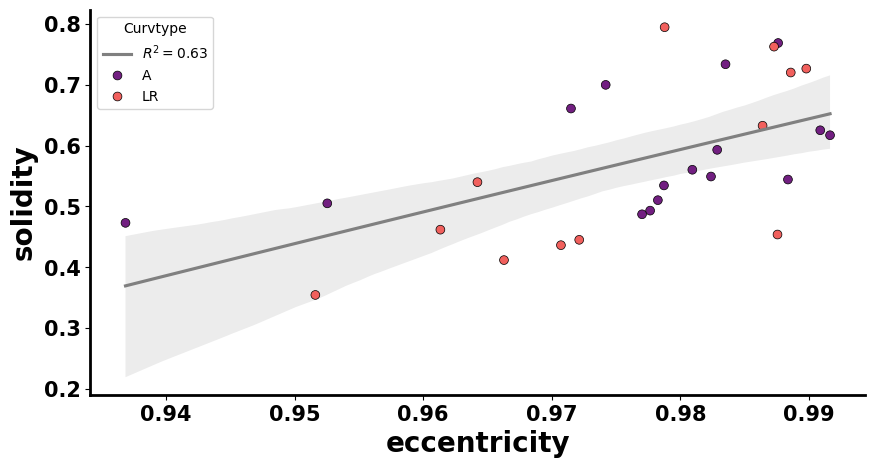

R^2:  0.6591452724444284


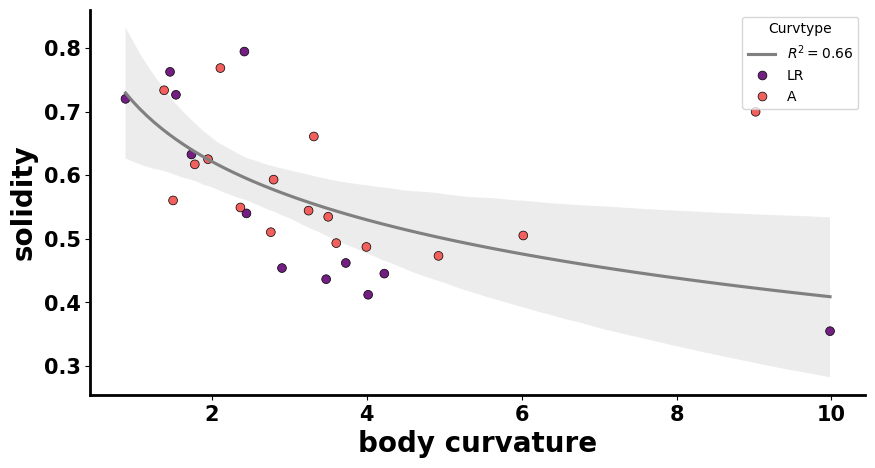

R^2:  0.8779384668156534


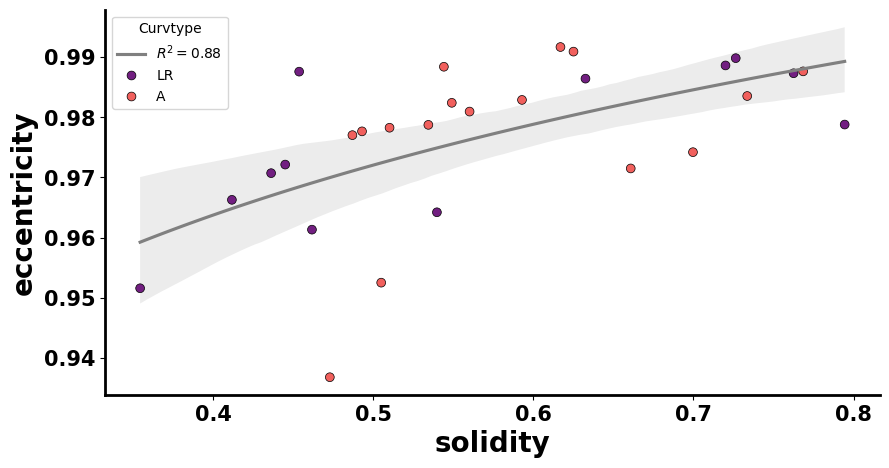

R^2:  0.7444984282329612


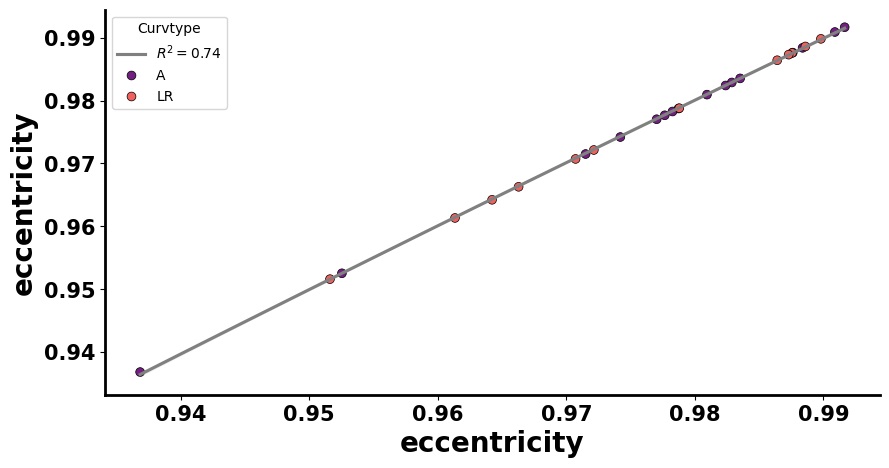

R^2:  0.7791059485180168


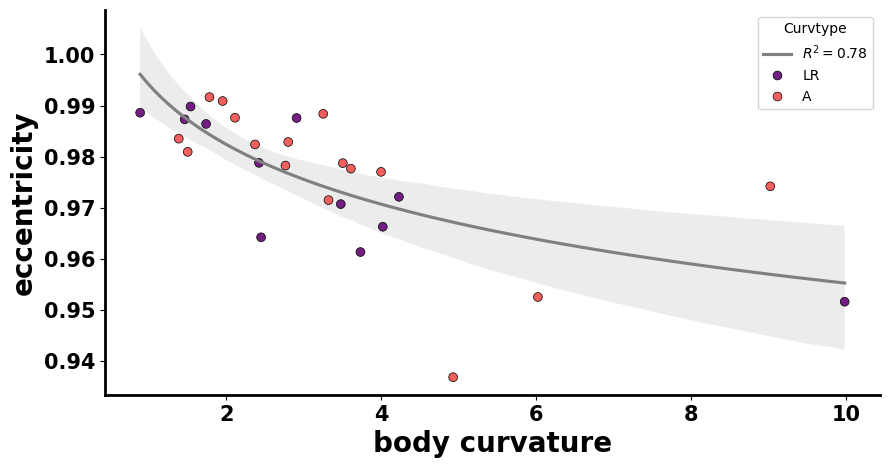

R^2:  0.7928974723659672


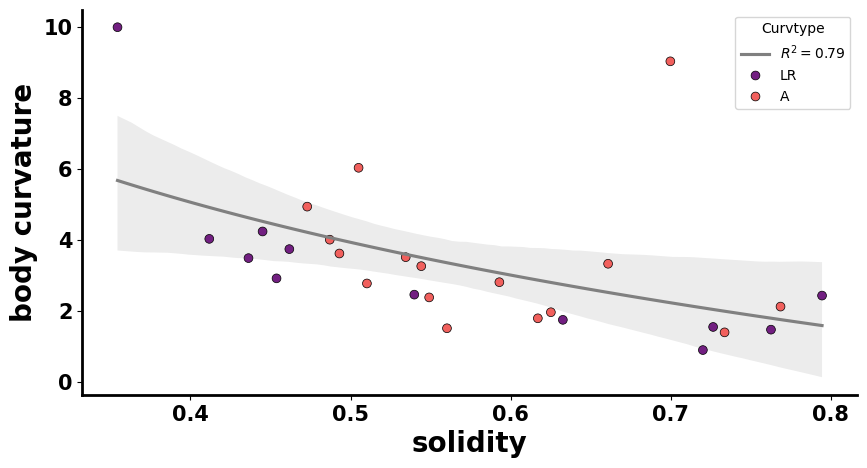

R^2:  0.8250401905340868


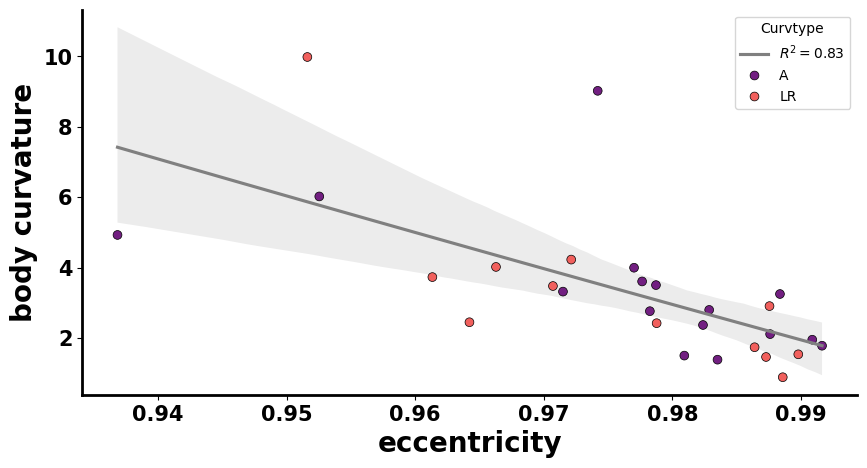

R^2:  0.9626306964453408


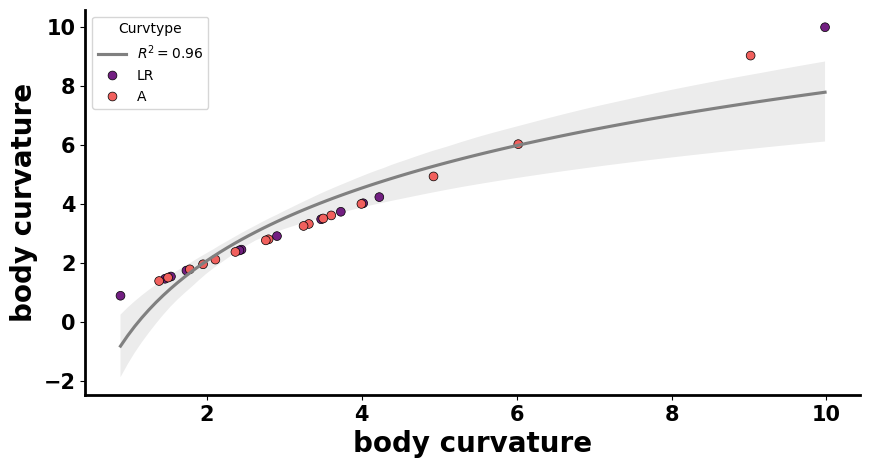

In [15]:
condition = 'Inpp5e'
df1 = df[(((df['Curvtype']=='S') | (df['Curvtype']=='A') | (df['Curvtype']=='C')| (df['Curvtype']=='LR') | (df['Curvtype']=='T'))& (df['condition']==condition))]
for i in ['solidity','eccentricity','body curvature']:
    for j in ['solidity','eccentricity','body curvature']:
        x_group=j
        y_variable=i
        violin,axs = scatterplot_delice(df1,x_group,y_variable,palette='magma',colorby='Curvtype',violin_width=0.8,point_size=40,jitter=0.06,title_size = 20,figsize=(10,5),violin_edge_color='black',fw='bold',add_regression='logx')
        violin.savefig(f"/Users/quillan/Documents/Lab/Thesis/Thesis_2024/Curvature Phenotyping/Figures/Fits/{condition}-{i}-{j}-plot.pdf")

         A mean:                            0.5616144930468924
         C mean:                           0.45056988456721214
         S mean:                            0.6811575614451009
         T mean:                            0.5002862906636532
Normality test p-value for the entire dataset (Shapiro): 0.0009765146533027291
Data follows normal distribution: No
A vs T | Mann-Whitney U test: Significant | padj: 0.016364448660563902  p-val: 0.0027274081100939836
A vs S | Mann-Whitney U test: Significant | padj: 4.577646647143223e-06  p-val: 7.629411078572038e-07
C vs T | Mann-Whitney U test: Not Significant | padj: 0.12247603409337614  p-val: 0.020412672348896023
A vs C | Mann-Whitney U test: Significant | padj: 0.001032624957787354  p-val: 0.00017210415963122568
C vs S | Mann-Whitney U test: Significant | padj: 4.037855959417224e-05  p-val: 6.72975993236204e-06
S vs T | Mann-Whitney U test: Significant | padj: 7.957827277875735e-09  p-val: 1.3263045463126225e-09


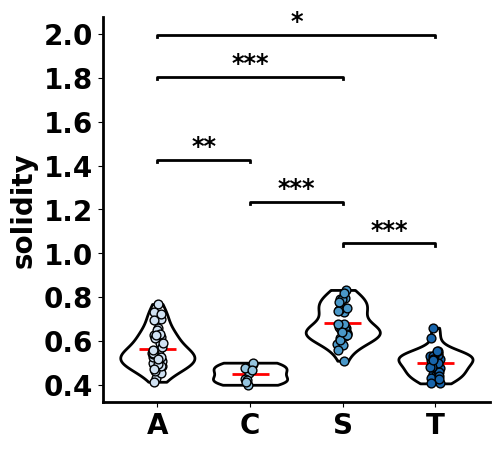

         A mean:                            0.9765471289158363
         C mean:                            0.9062454174462446
         S mean:                            0.9898421879175083
         T mean:                            0.9646333205418837
Normality test p-value for the entire dataset (Shapiro): 3.827536567855769e-14
Data follows normal distribution: No
A vs T | Mann-Whitney U test: Not Significant | padj: 0.14698639991680576  p-val: 0.024497733319467627
A vs S | Mann-Whitney U test: Significant | padj: 9.928461676585604e-07  p-val: 1.6547436127642674e-07
C vs T | Mann-Whitney U test: Significant | padj: 0.004932261707101917  p-val: 0.0008220436178503196
A vs C | Mann-Whitney U test: Significant | padj: 0.0001455756783932047  p-val: 2.426261306553412e-05
C vs S | Mann-Whitney U test: Significant | padj: 5.46608081917568e-05  p-val: 9.110134698626133e-06
S vs T | Mann-Whitney U test: Significant | padj: 4.082129976343496e-07  p-val: 6.803549960572493e-08


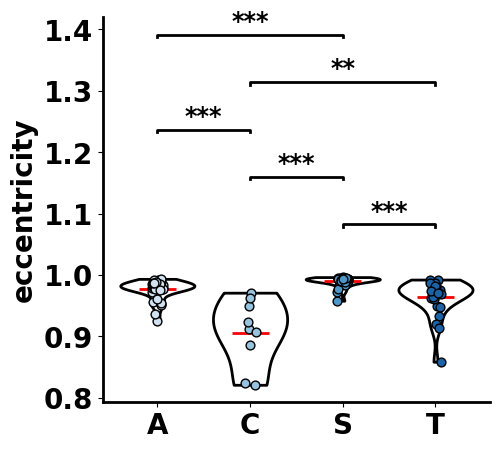

         A mean:                            3.0686367263315555
         C mean:                              5.80518948677799
         S mean:                            1.3684416145647817
         T mean:                             3.450389149221254
Normality test p-value for the entire dataset (Shapiro): 7.583310548398003e-07
Data follows normal distribution: No
A vs T | Mann-Whitney U test: Not Significant | padj: 2.042702541745944  p-val: 0.340450423624324
A vs S | Mann-Whitney U test: Significant | padj: 4.577646647143223e-06  p-val: 7.629411078572038e-07
C vs T | Mann-Whitney U test: Significant | padj: 0.01038650576341105  p-val: 0.0017310842939018416
A vs C | Mann-Whitney U test: Significant | padj: 0.005442679418832065  p-val: 0.0009071132364720108
C vs S | Mann-Whitney U test: Significant | padj: 5.46608081917568e-05  p-val: 9.110134698626133e-06
S vs T | Mann-Whitney U test: Significant | padj: 6.752720900752411e-07  p-val: 1.1254534834587351e-07


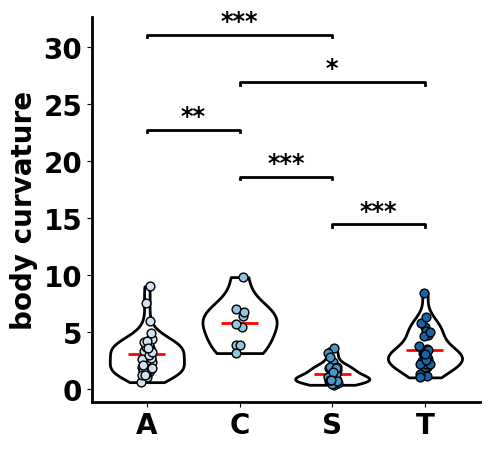

In [22]:
df1 = df[(((df['Curvtype']=='S') | (df['Curvtype']=='A') | (df['Curvtype']=='C') |  (df['Curvtype']=='T')))]
for i in ['solidity','eccentricity','body curvature']:
    x_group="Curvtype"
    y_variable=i
    violin,axs = violinplot_delice(df1,x_group,y_variable,palette='Blues',violin_width=0.8,point_size=40,jitter=0.06,title_size = 20,figsize=(5,5),violin_edge_color='black',fw='bold')
    violin.savefig(f"/Users/quillan/Documents/Lab/Thesis/Thesis_2024/Curvature Phenotyping/Figures/{i}-plot.pdf")

    Cc2d2a mean:                            0.5683672860265014
    Inpp5e mean:                            0.5747416867260001
        WT mean:                            0.9312711699747453
Normality test p-value for the entire dataset (Shapiro): 2.3126636098244912e-18
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 3.3587177284709724e-40  p-val: 1.1195725761569907e-40
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 2.404763242510694  p-val: 0.8015877475035647
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 7.40764996104552e-17  p-val: 2.46921665368184e-17


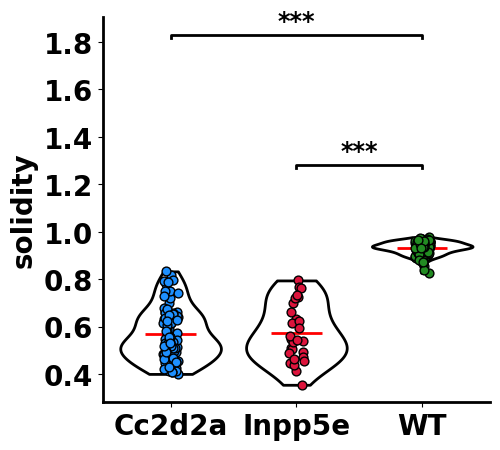

    Cc2d2a mean:                            0.9704123074083048
    Inpp5e mean:                             0.976420058626175
        WT mean:                            0.9956743731612228
Normality test p-value for the entire dataset (Shapiro): 7.3342017102515725e-28
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 1.4891022025936989e-36  p-val: 4.963674008645663e-37
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 1.5142939186815056  p-val: 0.5047646395605019
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 8.628972490892686e-17  p-val: 2.8763241636308957e-17


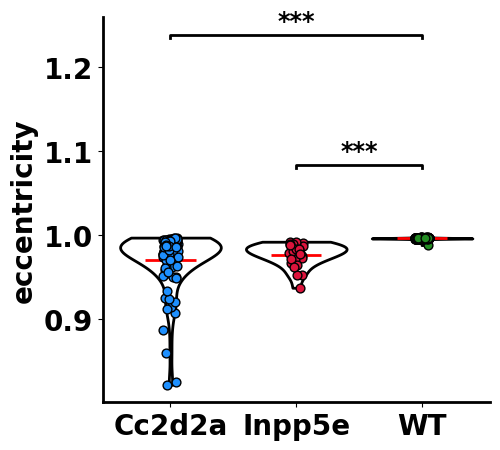

    Cc2d2a mean:                             2.823058259303723
    Inpp5e mean:                            3.3263179388392348
        WT mean:                            0.5647565735430766
Normality test p-value for the entire dataset (Shapiro): 5.2742757340202854e-23
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 1.2348167157239294e-34  p-val: 4.1160557190797647e-35
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 0.4473938261642044  p-val: 0.14913127538806814
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 9.454990489022167e-17  p-val: 3.151663496340722e-17


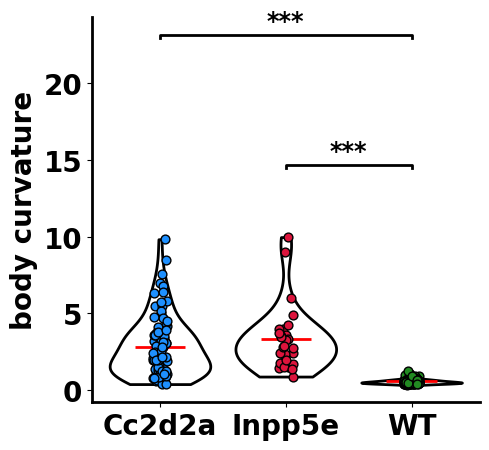

    Cc2d2a mean:                            0.5683672860265014
    Inpp5e mean:                            0.5747416867260001
        WT mean:                            0.9312711699747453
Normality test p-value for the entire dataset (Shapiro): 2.3126636098244912e-18
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 3.3587177284709724e-40  p-val: 1.1195725761569907e-40
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 2.404763242510694  p-val: 0.8015877475035647
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 7.40764996104552e-17  p-val: 2.46921665368184e-17


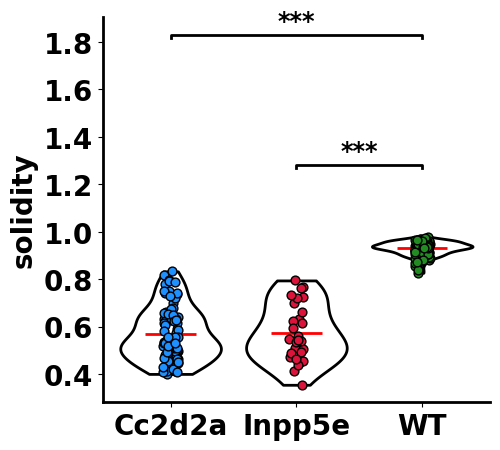

    Cc2d2a mean:                            0.9704123074083048
    Inpp5e mean:                             0.976420058626175
        WT mean:                            0.9956743731612228
Normality test p-value for the entire dataset (Shapiro): 7.3342017102515725e-28
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 1.4891022025936989e-36  p-val: 4.963674008645663e-37
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 1.5142939186815056  p-val: 0.5047646395605019
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 8.628972490892686e-17  p-val: 2.8763241636308957e-17


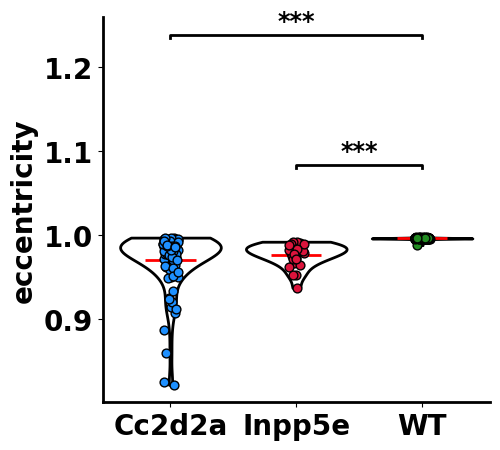

    Cc2d2a mean:                             2.823058259303723
    Inpp5e mean:                            3.3263179388392348
        WT mean:                            0.5647565735430766
Normality test p-value for the entire dataset (Shapiro): 5.2742757340202854e-23
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 1.2348167157239294e-34  p-val: 4.1160557190797647e-35
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 0.4473938261642044  p-val: 0.14913127538806814
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 9.454990489022167e-17  p-val: 3.151663496340722e-17


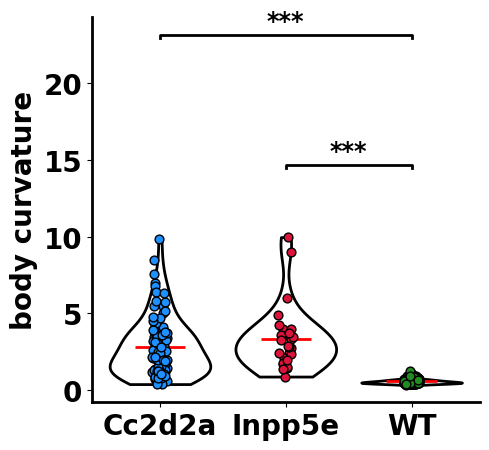

    Cc2d2a mean:                            0.5683672860265014
    Inpp5e mean:                            0.5747416867260001
        WT mean:                            0.9312711699747453
Normality test p-value for the entire dataset (Shapiro): 2.3126636098244912e-18
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 3.3587177284709724e-40  p-val: 1.1195725761569907e-40
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 2.404763242510694  p-val: 0.8015877475035647
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 7.40764996104552e-17  p-val: 2.46921665368184e-17


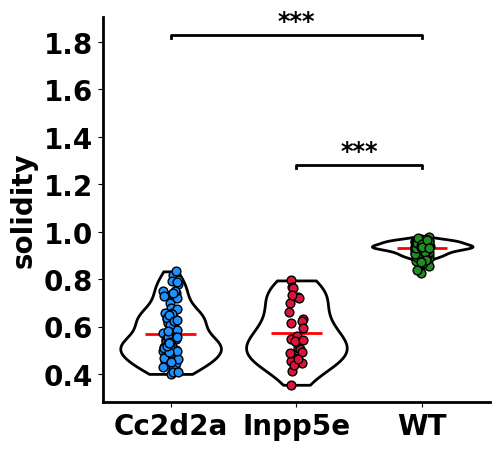

    Cc2d2a mean:                            0.9704123074083048
    Inpp5e mean:                             0.976420058626175
        WT mean:                            0.9956743731612228
Normality test p-value for the entire dataset (Shapiro): 7.3342017102515725e-28
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 1.4891022025936989e-36  p-val: 4.963674008645663e-37
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 1.5142939186815056  p-val: 0.5047646395605019
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 8.628972490892686e-17  p-val: 2.8763241636308957e-17


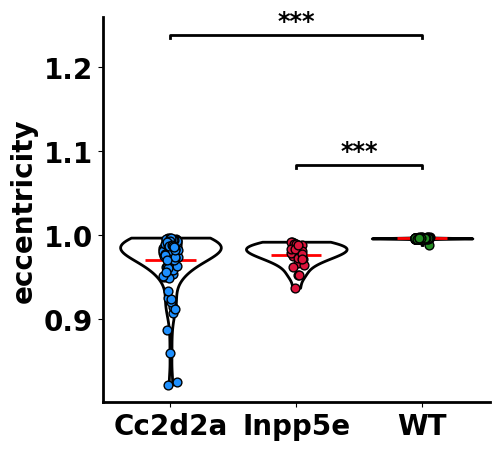

    Cc2d2a mean:                             2.823058259303723
    Inpp5e mean:                            3.3263179388392348
        WT mean:                            0.5647565735430766
Normality test p-value for the entire dataset (Shapiro): 5.2742757340202854e-23
Data follows normal distribution: No
Cc2d2a vs WT | Mann-Whitney U test: Significant | padj: 1.2348167157239294e-34  p-val: 4.1160557190797647e-35
Cc2d2a vs Inpp5e | Mann-Whitney U test: Not Significant | padj: 0.4473938261642044  p-val: 0.14913127538806814
Inpp5e vs WT | Mann-Whitney U test: Significant | padj: 9.454990489022167e-17  p-val: 3.151663496340722e-17


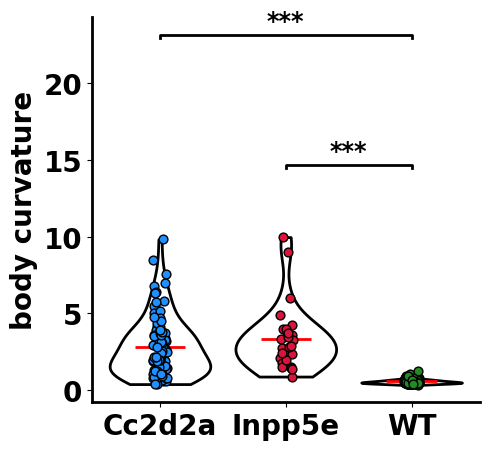

In [17]:
colors=['dodgerblue','crimson','forestgreen']
df['eccentricity_log'] = np.log(df['eccentricity'])
for cond in np.unique(df['condition']):
    
    for i in ['solidity','eccentricity','body curvature']:
        x_group='condition'
        y_variable=i
        violin,axs = violinplot_delice(df,x_group,y_variable,colors=colors,violin_width=0.8,point_size=40,jitter=0.06,title_size = 20,figsize=(5,5),violin_edge_color='black')
        violin.savefig(f"/Users/quillan/Documents/Lab/Thesis/Thesis_2024/Curvature Phenotyping/Figures/{i}-plot.pdf")
        del violin

In [18]:
# Counting occurrences in the 'Curvtype' column grouped by 'condition'
curvtype_condition_counts = df[((df['Curvtype']=='S') | (df['Curvtype']=='A') |  (df['Curvtype']=='T')|  (df['Curvtype']=='C'))].groupby('Curvtype')['condition'].value_counts().unstack().fillna(0)
# Extracting the data for one condition (e.g., 'Cc2d2a') with 2 columns: Curvtype and counts
curvtype_condition_counts.head()
condition_data = curvtype_condition_counts['Cc2d2a'].reset_index()
condition_data.columns = ['Curvtype', 'Counts']

condition_data['Counts'] = condition_data['Counts']/np.sum(condition_data['Counts'])*100
condition_data

,Curvtype,Counts
0,A,26.086957
1,C,9.782609
2,S,33.695652
3,T,30.434783


         A mean:                             26.08695652173913
         C mean:                             9.782608695652174
         S mean:                             33.69565217391305
         T mean:                            30.434782608695656


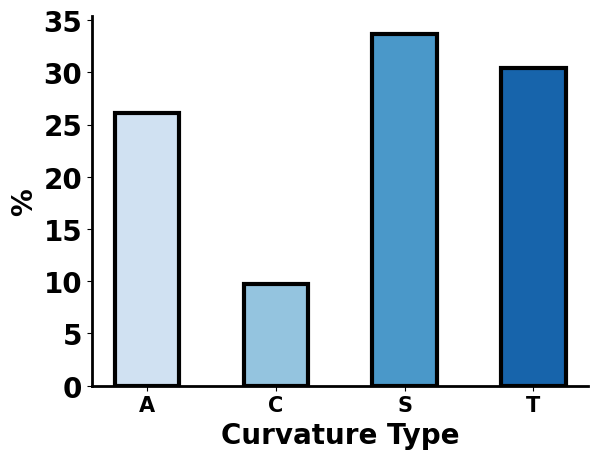

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Curvature Type', ylabel='%'>)

In [19]:
barplot_delice(condition_data,'Curvtype','Counts',palette="Blues",x_label="Curvature Type",y_label="%",point_size=40,jitter=0.19,title_size = 20,label_rotation=0,stats=False,scatter=False)


In [20]:
# Counting occurrences in the 'Curvtype' column grouped by 'condition'
curvtype_condition_counts = df[( (df['Curvtype']=='A') |  (df['Curvtype']=='LR'))].groupby('Curvtype')['condition'].value_counts().unstack().fillna(0)
# Extracting the data for one condition (e.g., 'Cc2d2a') with 2 columns: Curvtype and counts
curvtype_condition_counts.head()
condition_data = curvtype_condition_counts['Inpp5e'].reset_index()
condition_data.columns = ['Curvtype', 'Counts']

condition_data['Counts'] = condition_data['Counts']/np.sum(condition_data['Counts'])*100
condition_data

,Curvtype,Counts
0,A,57.142857
1,LR,42.857143


         A mean:                             57.14285714285714
        LR mean:                            42.857142857142854


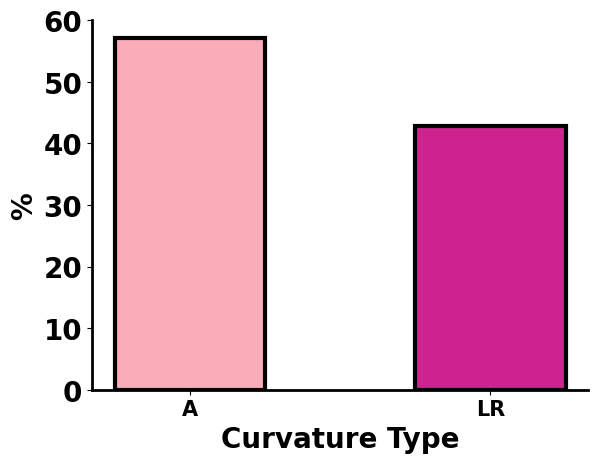

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Curvature Type', ylabel='%'>)

In [21]:
barplot_delice(condition_data,'Curvtype','Counts',palette="RdPu",x_label="Curvature Type",y_label="%",point_size=40,jitter=0.19,title_size = 20,label_rotation=0,stats=False,scatter=False)
